In [1]:
#importing libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing database
df = pd.read_csv('Cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
df.set_index('id', inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.describe()
#all of them have outliers


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
col_names = df.drop('diagnosis',axis=1).columns
for i in col_names:
      col_data = df[i].values.reshape(-1, 1)

      transformed_col_data = quantile_transform(col_data, n_quantiles=4, output_distribution='uniform')

      df[i] = transformed_col_data

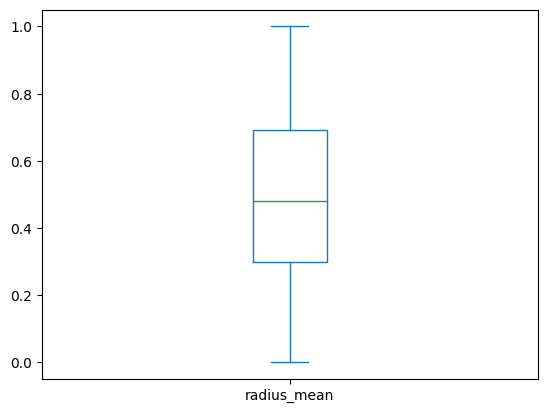

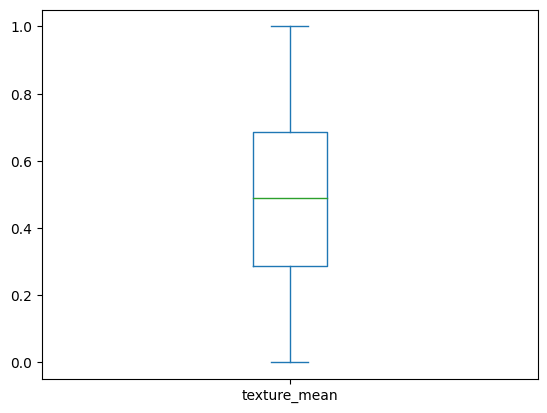

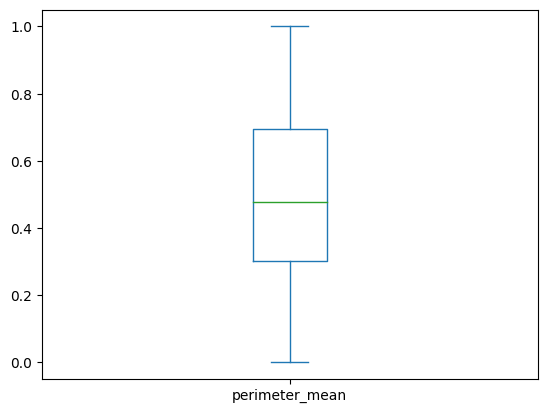

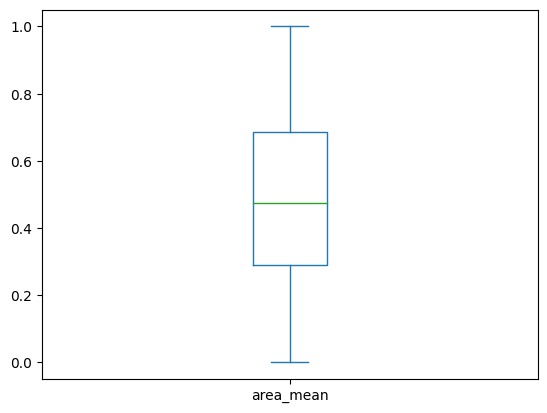

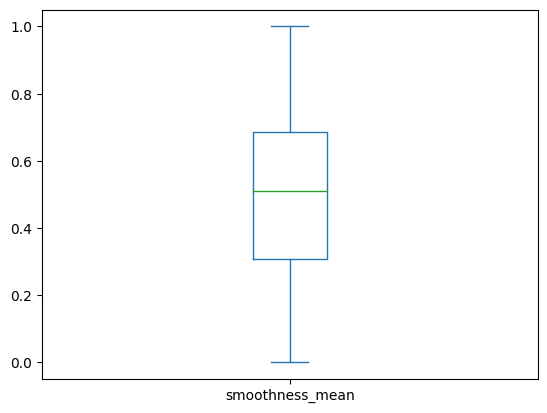

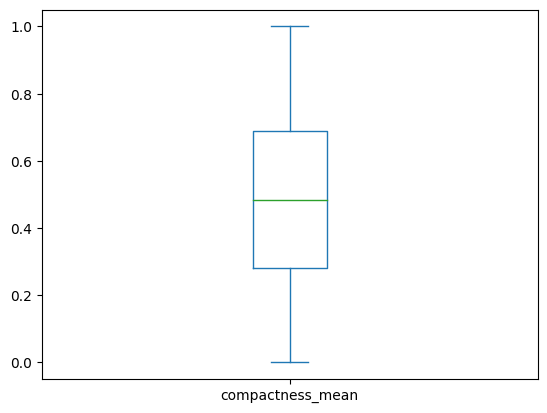

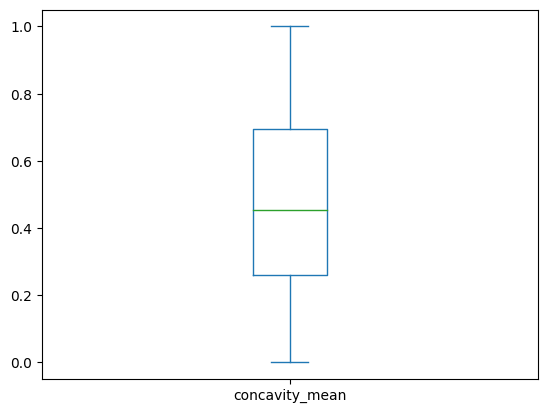

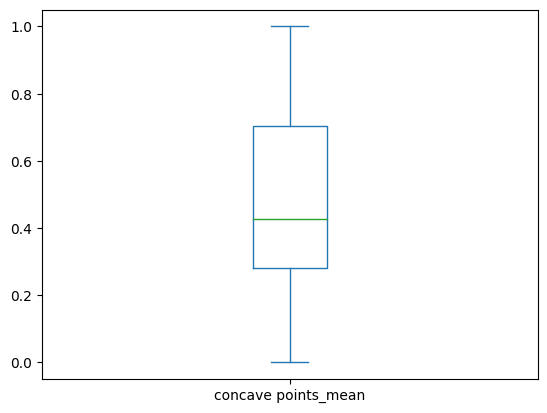

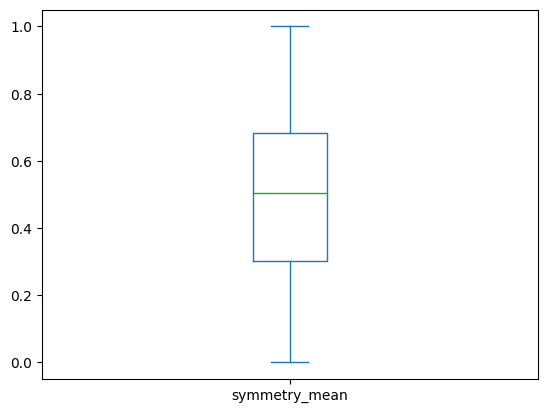

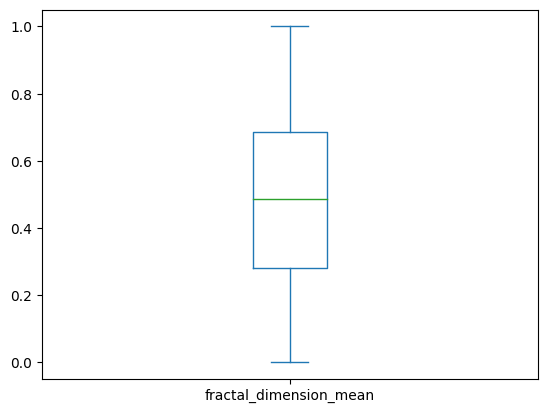

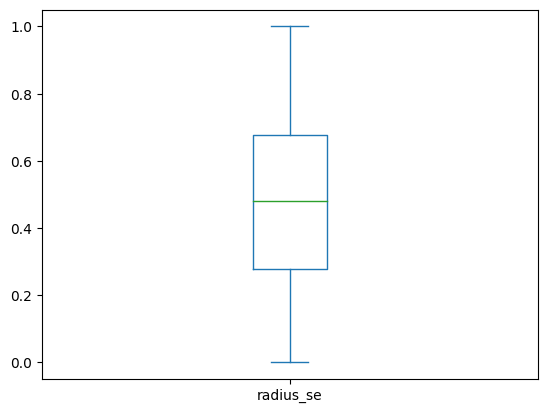

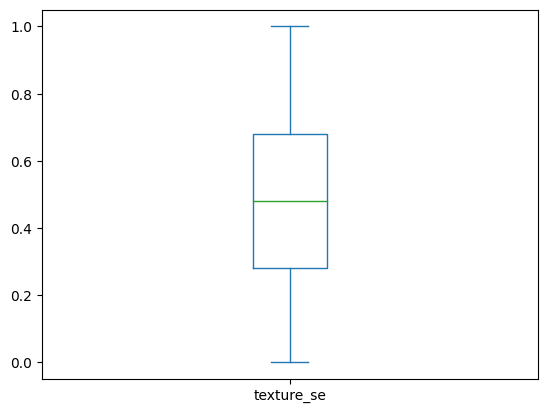

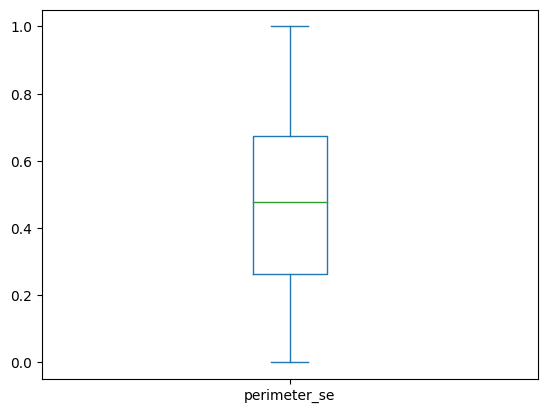

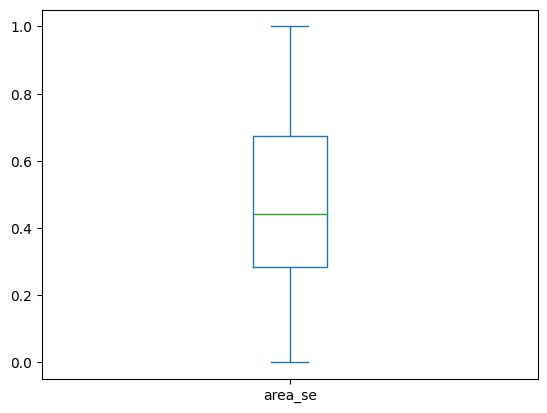

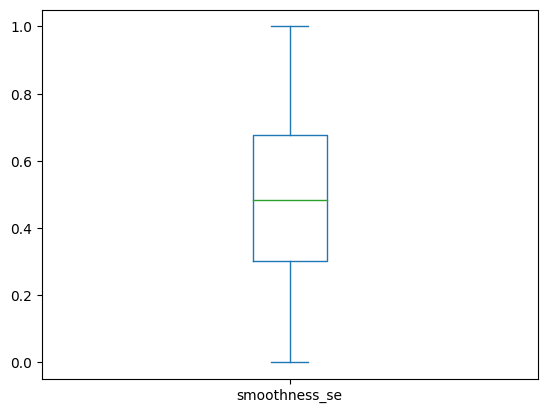

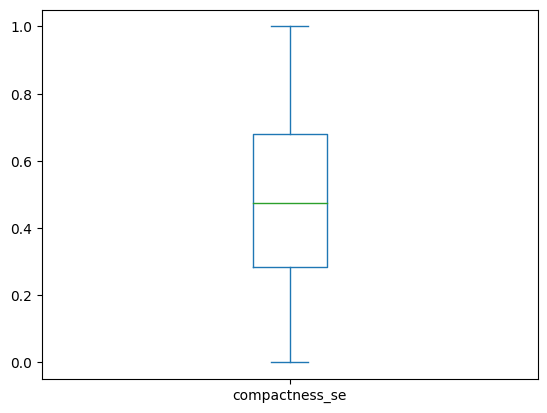

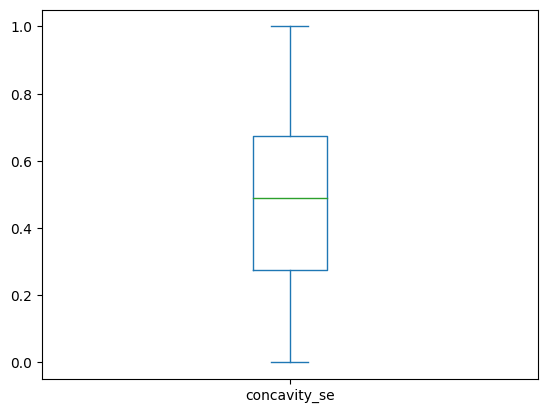

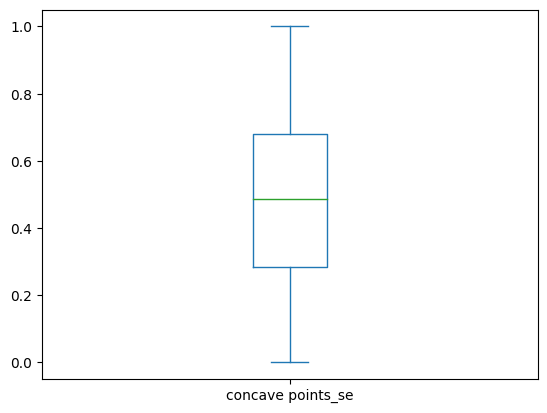

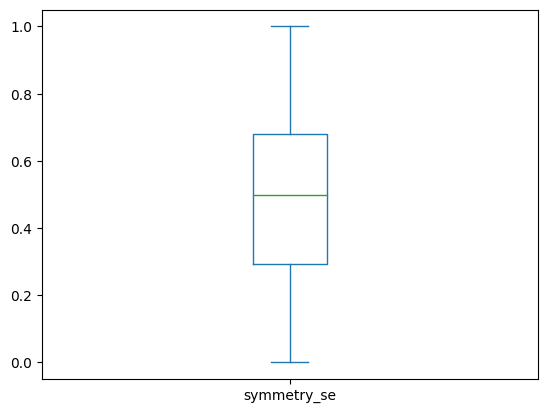

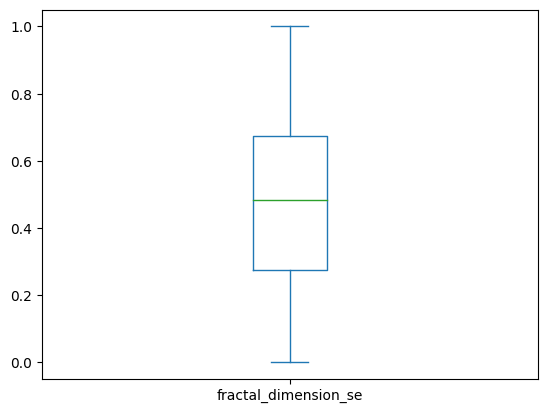

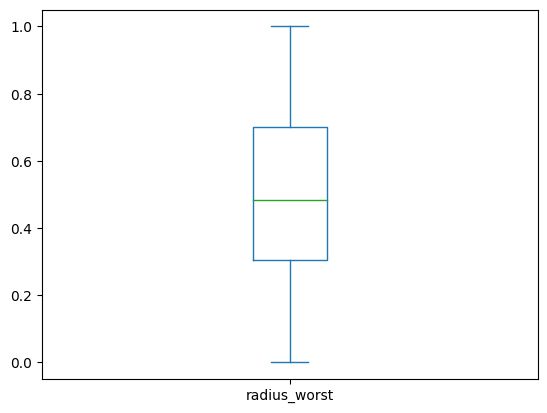

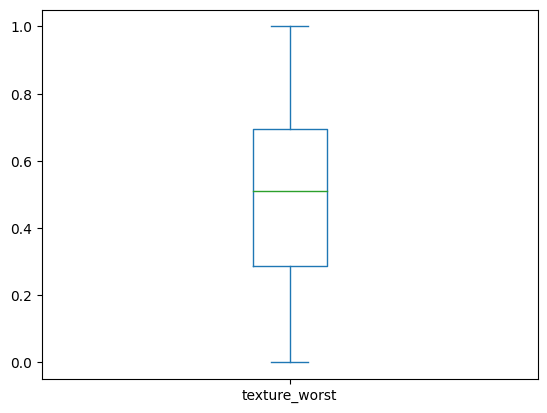

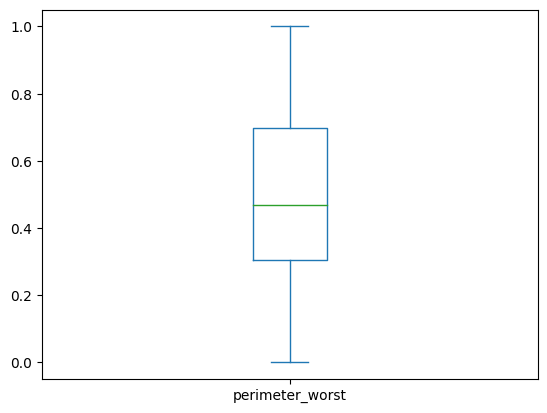

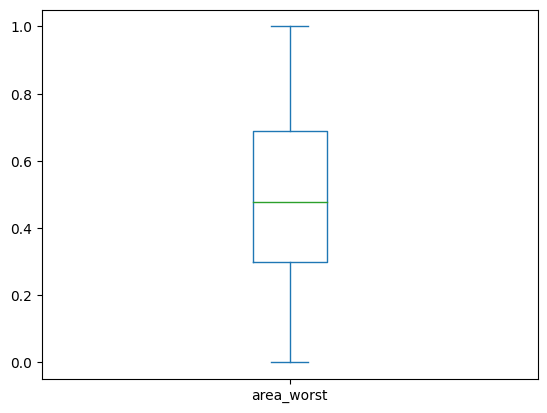

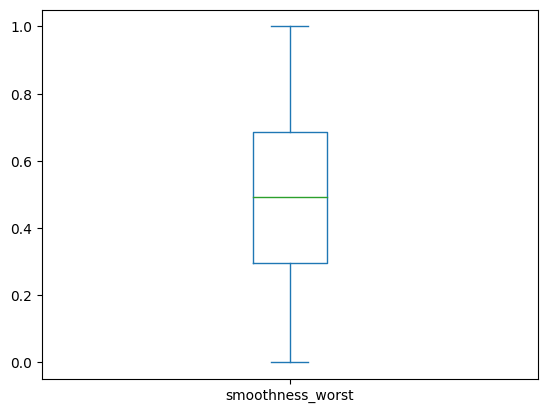

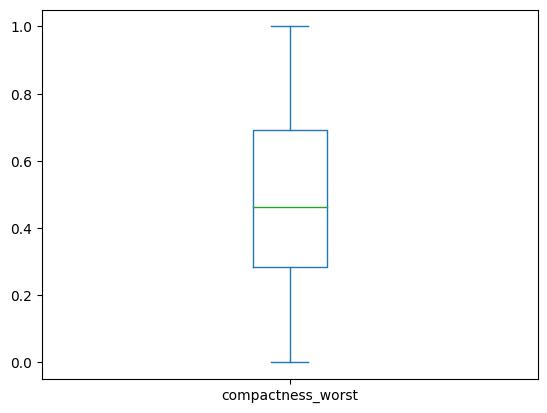

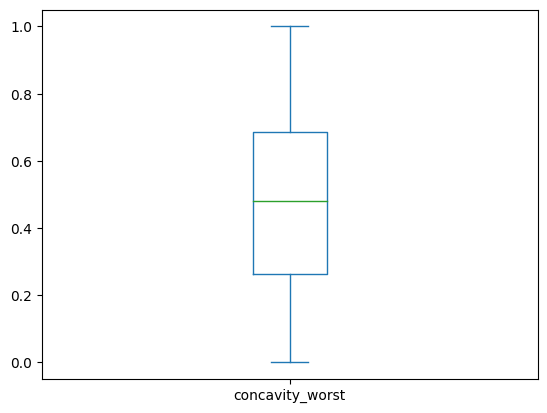

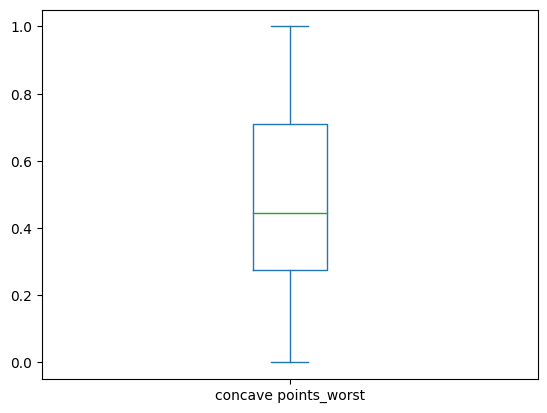

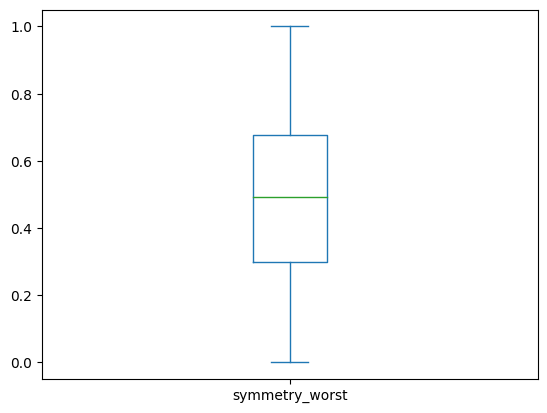

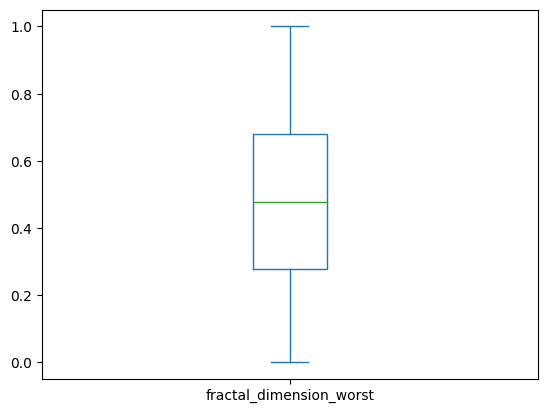

In [10]:
col_names = df.drop('diagnosis',axis=1).columns
for i in col_names:
        df[i].plot(kind='box')
        plt.show()

In [11]:
#these ranges of skewness are acceptable
skewness = df.drop('diagnosis', axis=1).skew()
print(skewness)

radius_mean                0.037831
texture_mean              -0.115126
perimeter_mean             0.040263
area_mean                 -0.039104
smoothness_mean           -0.072210
compactness_mean          -0.079328
concavity_mean            -0.118919
concave points_mean       -0.028251
symmetry_mean             -0.027040
fractal_dimension_mean    -0.109727
radius_se                 -0.220831
texture_se                -0.236100
perimeter_se              -0.215007
area_se                   -0.149703
smoothness_se             -0.085347
compactness_se            -0.099302
concavity_se              -0.354790
concave points_se         -0.220274
symmetry_se               -0.132306
fractal_dimension_se      -0.212176
radius_worst               0.022415
texture_worst             -0.103432
perimeter_worst            0.037180
area_worst                -0.078774
smoothness_worst          -0.062475
compactness_worst         -0.103589
concavity_worst           -0.240833
concave points_worst       0

In [12]:
df['diagnosis'] = df['diagnosis'].replace('M',0)
df['diagnosis'] = df['diagnosis'].replace('B',1)
df['diagnosis'] = df['diagnosis'].astype('float').astype('int')


In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,0.747063,0.029844,0.762764,0.726851,0.756757,0.901639,0.869731,0.873799,0.817995,...,0.815283,0.168411,0.839479,0.780376,0.752459,0.831537,0.804616,0.942588,0.810423,0.754659
842517,0,0.811547,0.387531,0.799234,0.786033,0.291962,0.373348,0.585618,0.694341,0.533333,...,0.808525,0.387090,0.777296,0.774186,0.360771,0.388335,0.506251,0.764521,0.438740,0.671919
84300903,0,0.789553,0.675836,0.788763,0.763635,0.709189,0.730886,0.764137,0.829010,0.715416,...,0.783920,0.516595,0.762111,0.749914,0.679508,0.728030,0.710017,0.892353,0.718474,0.667931
84348301,0,0.280825,0.632832,0.323938,0.253660,0.887027,0.910779,0.809377,0.776057,0.870164,...,0.477144,0.575850,0.482932,0.348994,0.947541,0.917701,0.795572,0.924871,1.000000,0.904467
84358402,0,0.804549,0.206236,0.807178,0.780752,0.628270,0.691571,0.764754,0.773957,0.528922,...,0.766072,0.147479,0.761388,0.736746,0.598949,0.442263,0.691785,0.711819,0.255272,0.390181


In [14]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,shuffle=True,random_state= 400)

In [16]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

[[52  2]
 [ 3 86]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.98      0.97      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [18]:
model = LinearRegression().fit(X,Y)
print(model.score(X,Y))

0.7912872478446753
